## Human vs. AI Text: Leveraging Authenticity to Optimize Engagement and Brand Trust
### Business Goal:
- To uncover how differences between AI-generated and human-generated content affect consumer perceptions, engagement, and trust—helping companies decide when to use AI and how to humanize it for strategic communication.

### Research Objectives
1. Discover distinguishing linguistic and thematic traits between human and AI-generated text to inform marketing and customer service content strategies.
2. Classify and score content based on human-likeness and perceived energy, aiding companies in deploying the right type of content based on context (e.g., customer onboarding vs. automated support).
3. Evaluate the potential for hybrid content generation—where AI writes drafts that humans optimize for emotional or persuasive appeal.
### Business Outcomes
1. Inform AI content deployment policies (e.g., “use AI for FAQs, but humanize social media posts”).
2. Improve brand authenticity and customer trust by avoiding robotic tone in human-facing touchpoints.
3. Enable cost-efficient content creation while minimizing risk of brand damage from AI-sounding text.    
### Analysis Techniques
1) LDA topic modeling
    - Understand what themes AI tends to default to (e.g., generic or factual topics) and what themes humans cover with more creativity or emotion—this helps content managers prioritize human oversight for specific topics.
2) Lexical and Emotional Style Analysis via Sentiment or Subjectivity Scoring
    - If human content scores consistently higher in excitement, trust, or subjectivity, this signals where human writing adds emotional value (e.g., email campaigns, ads)
    - Potential inprovement:
        - classification models (e.g., SVM, Logistic Regression) to train a detector of AI-generated text and interpret which linguistic features most influence the decision.
        - N-gram and POS analysis for more granular differences in grammar and syntax.

## Data Overview

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
example = pd.read_csv("/Users/ellaxu/Desktop/Spring 2025/Text Mining/Project_AI_Human/AI_Human.csv")
example['label'] = example['generated'].map({0: 'Human', 1: 'AI'})
example.sample(100)

,text,generated,label
61399,I think the students should take part time in ...,0.0,Human
103082,Petting ANB Driving Essay\n\nDriving alone can...,0.0,Human
247008,First impression are the initial opinion and a...,1.0,AI
301562,Students need a freak from school. Continuing ...,0.0,Human
107421,I disagree with the principal's decision to ma...,1.0,AI
...,...,...,...
94162,My argument is about how the landform is just ...,0.0,Human
58696,People in science class tries to figher out th...,0.0,Human
72514,Pharmacists are healthcare professionals who w...,1.0,AI
219180,Electoral Congress\n\nHave you ever wondered h...,0.0,Human


In [30]:
import pandas as pd

df = pd.read_csv("/Users/ellaxu/Desktop/Spring 2025/Text Mining/Project_AI_Human/AI_Human.csv")
df['label'] = df['generated'].map({0: 'Human', 1: 'AI'})
print("Data dimensions:", df.shape)
print("Column names:", df.columns.tolist())
df.head()

Data dimensions: (487235, 3)
Column names: ['text', 'generated', 'label']


,text,generated,label
0,Cars. Cars have been around since they became ...,0.0,Human
1,Transportation is a large necessity in most co...,0.0,Human
2,"""America's love affair with it's vehicles seem...",0.0,Human
3,How often do you ride in a car? Do you drive a...,0.0,Human
4,Cars are a wonderful thing. They are perhaps o...,0.0,Human


In [31]:
print("\nMissing values:\n", df.isnull().sum())
print("\nLabel distribution:\n", df['label'].value_counts())
print("\nData types:\n", df.dtypes)
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
print("\nSummary of text lengths:\n", df['text_length'].describe())


Missing values:
 text         0
generated    0
label        0
dtype: int64

Label distribution:
 label
Human    305797
AI       181438
Name: count, dtype: int64

Data types:
 text          object
generated    float64
label         object
dtype: object

Summary of text lengths:
 count    487235.000000
mean        393.096214
std         168.593328
min           0.000000
25%         278.000000
50%         363.000000
75%         471.000000
max        1668.000000
Name: text_length, dtype: float64


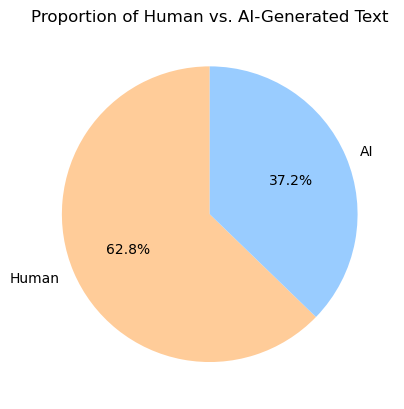

/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


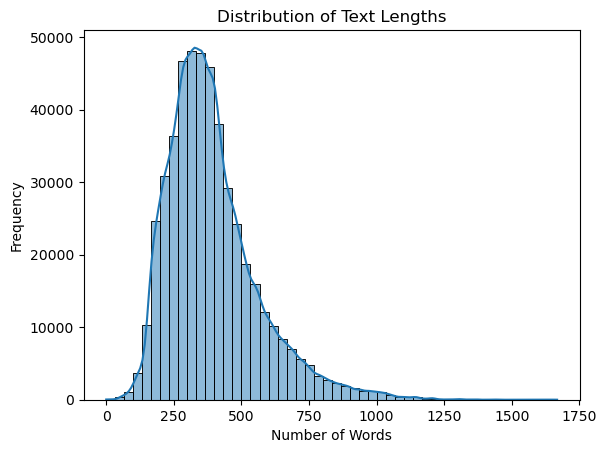

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#ffcc99", "#99ccff"])
plt.title("Proportion of Human vs. AI-Generated Text")
plt.ylabel("")
plt.show()

sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

## Data Normalization

In [23]:
import sys
sys.path.append("/Users/ellaxu/Desktop/Spring 2025/Text Mining/Project_AI_Human")
from Text_Normalization_Function import normalize_corpus

In [34]:
from joblib import Parallel, delayed
import multiprocessing
import pandas as pd

num_cores = multiprocessing.cpu_count()

def normalize_one(row):
    return normalize_corpus([row])[0]

chunk_size = 100_000
chunks = [df[i:i+chunk_size] for i in range(0, len(df), chunk_size)]

for i, chunk in enumerate(chunks):
    print(f"Processing chunk {i+1}/{len(chunks)}")
    chunk['normalized_text'] = Parallel(n_jobs=num_cores)(
        delayed(normalize_one)(text) for text in chunk['text']
    )
    chunk[['normalized_text', 'generated']].to_csv(f"normalized_text_part_{i+1}_multi.csv", index=False)

Processing chunk 1/5


[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data] Downloading package omw-1.4 to /Users/ellaxu/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data]   Package omw-1.4 is already up-to-date!
[

Processing chunk 2/5


/var/folders/bh/0km11nqd4mjchgy6dj99ptf80000gn/T/ipykernel_45364/3816505300.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['normalized_text'] = Parallel(n_jobs=num_cores)(


Processing chunk 3/5


/var/folders/bh/0km11nqd4mjchgy6dj99ptf80000gn/T/ipykernel_45364/3816505300.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['normalized_text'] = Parallel(n_jobs=num_cores)(


Processing chunk 4/5


/var/folders/bh/0km11nqd4mjchgy6dj99ptf80000gn/T/ipykernel_45364/3816505300.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['normalized_text'] = Parallel(n_jobs=num_cores)(


Processing chunk 5/5


/var/folders/bh/0km11nqd4mjchgy6dj99ptf80000gn/T/ipykernel_45364/3816505300.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['normalized_text'] = Parallel(n_jobs=num_cores)(


Data shape: (487235, 4)
Column names: ['normalized_text', 'generated', 'text_length', 'label']
Preview of the data:


,normalized_text,generated,text_length,label
0,car car around since become famous 1900s henry...,0.0,301,Human
1,transportation large necessity country worldwi...,0.0,246,Human
2,america love affair vehicle seem cool elisabet...,0.0,391,Human
3,often ride car drive motor vehicle work store ...,0.0,351,Human
4,car wonderful thing perhaps world great advanc...,0.0,431,Human


Missing values: normalized_text    16
generated           0
text_length         0
label               0
dtype: int64
Number of duplicated rows: 41300
Text length summary:
 count    487235.000000
mean        192.779419
std          85.917060
min           1.000000
25%         132.000000
50%         179.000000
75%         234.000000
max         922.000000
Name: text_length, dtype: float64


/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


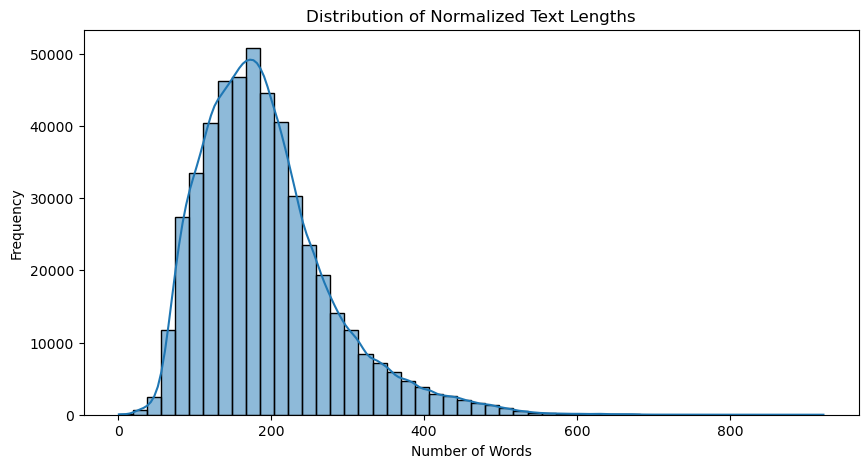

In [38]:
data['label'] = data['generated'].map({0: 'Human', 1: 'AI'})
print("Data shape:", data.shape)
print("Column names:", data.columns.tolist())
print("Preview of the data:")
display(data.head())
print("Missing values:", data.isnull().sum())
print("Number of duplicated rows:", data.duplicated().sum())
data['text_length'] = data['normalized_text'].apply(lambda x: len(str(x).split()))

# Summary statistics
print("Text length summary:\n", data['text_length'].describe())

# Distribution plot
plt.figure(figsize=(10, 5))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title("Distribution of Normalized Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

## Finalized df ready to use

Remaining rows after drop: 487219


/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


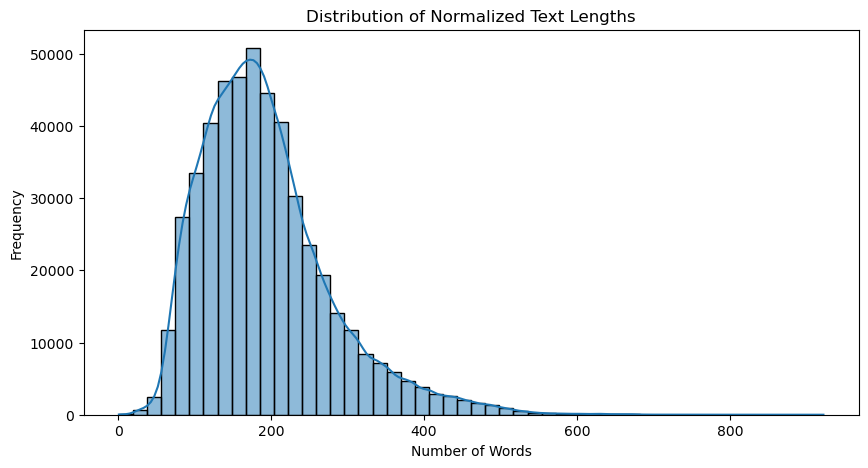

In [39]:
data = data.dropna(subset=['normalized_text'])
print("Remaining rows after drop:", data.shape[0])
plt.figure(figsize=(10, 5))
sns.histplot(data['text_length'], bins=50, kde=True)
plt.title("Distribution of Normalized Text Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [40]:
data.head(10)

,normalized_text,generated,text_length,label
0,car car around since become famous 1900s henry...,0.0,301,Human
1,transportation large necessity country worldwi...,0.0,246,Human
2,america love affair vehicle seem cool elisabet...,0.0,391,Human
3,often ride car drive motor vehicle work store ...,0.0,351,Human
4,car wonderful thing perhaps world great advanc...,0.0,431,Human
5,electrol college system unfair system people r...,0.0,243,Human
6,dear state senator utmost respect method presi...,0.0,205,Human
7,fellow citizen car become major role daily lif...,0.0,210,Human
8,official electoral college unfair outdated irr...,0.0,221,Human
9,electoral college keep century establish found...,0.0,250,Human


## Topic Modeling

### Pt 1: For the whole data

### Use BoW for LDA topic extraction
- The code below shows topic extraction for different number of categories. After evaluation for number of topic = 4,6,8, based on the result, we go for n = 6.

In [3]:
import pandas as pd
import glob
import os

folder_path = "/Users/ellaxu/Desktop/Spring 2025/Text Mining/Project_AI_Human"
csv_files = sorted(glob.glob(os.path.join(folder_path, "normalized_text_part_*_multi.csv")))
data = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)
data = data.dropna(subset=['normalized_text'])
data.head()

,normalized_text,generated
0,car car around since become famous 1900s henry...,0.0
1,transportation large necessity country worldwi...,0.0
2,america love affair vehicle seem cool elisabet...,0.0
3,often ride car drive motor vehicle work store ...,0.0
4,car wonderful thing perhaps world great advanc...,0.0


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(
    max_df=0.95,
    min_df=10,
    max_features=10000,
    stop_words='english',
    
)
count_matrix = count_vectorizer.fit_transform(data["normalized_text"])
print(count_matrix)
#print("Working on lda_model4")
#lda_model4 = LatentDirichletAllocation(
#    n_components=4,
#    max_iter=5,
#    learning_method='batch',
#    random_state=42,
#    n_jobs=-1 
#)
#lda_model4.fit(count_matrix)
print("Working on lda_model6")
lda_model6 = LatentDirichletAllocation(
    n_components=6,
    max_iter=5,
    learning_method='batch',
    random_state=42,
    n_jobs=-1 
)
#lda_model6.fit(count_matrix)
#print("Working on lda_model8")
#lda_model8 = LatentDirichletAllocation(
#    n_components=8,
#    max_iter=5,
#    learning_method='batch',
#    random_state=42,
#    n_jobs=-1 
#)

  (0, 1319)	22
  (0, 3357)	1
  (0, 6)	1
  (0, 4186)	1
  (0, 3578)	1
  (0, 2072)	1
  (0, 1175)	1
  (0, 6726)	1
  (0, 5433)	1
  (0, 7604)	1
  (0, 2231)	8
  (0, 5282)	1
  (0, 6580)	4
  (0, 8370)	1
  (0, 7140)	1
  (0, 5247)	1
  (0, 9393)	1
  (0, 3888)	5
  (0, 8853)	5
  (0, 5244)	4
  (0, 9397)	6
  (0, 5236)	4
  (0, 5530)	1
  (0, 572)	4
  (0, 3808)	1
  :	:
  (487218, 5903)	1
  (487218, 1747)	1
  (487218, 7540)	1
  (487218, 1792)	1
  (487218, 8403)	1
  (487218, 3291)	1
  (487218, 4918)	1
  (487218, 1355)	1
  (487218, 3244)	1
  (487218, 198)	1
  (487218, 730)	1
  (487218, 5577)	1
  (487218, 8796)	1
  (487218, 5551)	2
  (487218, 878)	1
  (487218, 5334)	1
  (487218, 6602)	1
  (487218, 199)	1
  (487218, 6043)	1
  (487218, 1684)	1
  (487218, 535)	1
  (487218, 179)	1
  (487218, 6310)	1
  (487218, 6438)	12
  (487218, 9919)	11
Working on lda_model4
Working on lda_model6


In [5]:
lda_model6.fit(count_matrix)

/Users/ellaxu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

LatentDirichletAllocation(max_iter=5, n_components=6, n_jobs=-1,
                          random_state=42)

In [8]:
import numpy as np
import pyLDAvis
pyLDAvis.enable_notebook()

topic_term_dists = lda_model4.components_
topic_term_dists = topic_term_dists / topic_term_dists.sum(axis=1)[:, None]
doc_topic_dists = lda_model4.transform(count_matrix)
doc_lengths = np.asarray(count_matrix.sum(axis=1)).flatten()
vocab = np.array(count_vectorizer.get_feature_names_out())
term_frequency = np.asarray(count_matrix.sum(axis=0)).flatten()

panel = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab,
    term_frequency
)

pyLDAvis.display(panel)

In [6]:
import numpy as np
import pyLDAvis
pyLDAvis.enable_notebook()
lda_model6.fit(count_matrix)

topic_term_dists = lda_model6.components_
topic_term_dists = topic_term_dists / topic_term_dists.sum(axis=1)[:, None]
doc_topic_dists = lda_model6.transform(count_matrix)
doc_lengths = np.asarray(count_matrix.sum(axis=1)).flatten()
vocab = np.array(count_vectorizer.get_feature_names_out())
term_frequency = np.asarray(count_matrix.sum(axis=0)).flatten()

panel = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab,
    term_frequency
)

pyLDAvis.display(panel)

In [7]:
pyLDAvis.save_html(panel, 'lda.html')

In [11]:
lda_model8.fit(count_matrix)

topic_term_dists = lda_model8.components_
topic_term_dists = topic_term_dists / topic_term_dists.sum(axis=1)[:, None]
doc_topic_dists = lda_model8.transform(count_matrix)
doc_lengths = np.asarray(count_matrix.sum(axis=1)).flatten()
vocab = np.array(count_vectorizer.get_feature_names_out())
term_frequency = np.asarray(count_matrix.sum(axis=0)).flatten()

panel = pyLDAvis.prepare(
    topic_term_dists,
    doc_topic_dists,
    doc_lengths,
    vocab,
    term_frequency
)

pyLDAvis.display(panel)

/Users/ellaxu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas re

- n_category = 4
	•	Pros:
	•	Clear topic separation: Each bubble is distinct, particularly Topic 4 being far from others.
	•	Lower overlap, easier interpretation.
	•	Cons:
	•	May be too coarse: Fewer topics could blend distinct themes together.
	•	Some meaningful nuance might be lost.

- Use if: You want simplicity and a broader overview with minimal confusion.
--------

- n_category = 6
	•	Pros:
	•	Balanced separation: Some overlap but distinguishable clusters.
	•	Moderate granularity: Captures more nuance than 4, without being overwhelming.
	•	Cons:
	•	Some clusters (e.g., 2, 4, 6) are close together, hinting at potential thematic similarity.

- Best middle ground — good tradeoff between interpretability and granularity.

---------

- n_category = 8
	•	Pros:
	•	Rich detail: Captures subtle differences across topics.
	•	Cons:
	•	Higher topic overlap — especially clusters like 1, 4, 6 — which may complicate interpretation.
	•	Slight redundancy or splitting of related themes (e.g., multiple education or tech-related clusters).

- Risk of overfitting / redundancy if your goal is to deliver business insights or storytelling.
------
- **Conclusion: We go with n_category = 6**

In [8]:
feature_names = count_vectorizer.get_feature_names_out()

top_n = 15

topic_keywords = []

for topic_idx, topic in enumerate(lda_model6.components_):
    top_features_indices = topic.argsort()[::-1][:top_n]
    top_features = [feature_names[i] for i in top_features_indices]
    topic_keywords.append(top_features)

topics_df = pd.DataFrame(topic_keywords)
topics_df.index = [f"Topic {i}" for i in range(lda_model6.n_components)]
topics_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Topic 0,people,like,life,thing,good,think,work,know,help,want,important,example,way,person,positive
Topic 1,car,drive,people,use,usage,driverless,limit,reduce,city,phone,driver,transportation,pollution,air,day
Topic 2,vote,electoral,college,state,venus,president,election,candidate,popular,people,elector,planet,voter,author,win
Topic 3,people,help,advice,cowboy,opinion,different,decision,good,program,experience,seagoing,person,life,learn,new
Topic 4,student,school,class,time,work,activity,help,learn,good,teacher,home,online,community,sport,grade
Topic 5,student,project,face,teacher,technology,use,mar,summer,emotion,design,computer,phone,alien,facial,like


#### Label info
- Topic 0: General Opinions & Social Commentary
- Topic 1: Transportation & Lifestyle
- Topic 2: Politics & Elections
- Topic 3: Student Experience & Learning Support
- Topic 4: Education & Community Engagement
- Topic 5: Technology, Emotions & Human Interaction

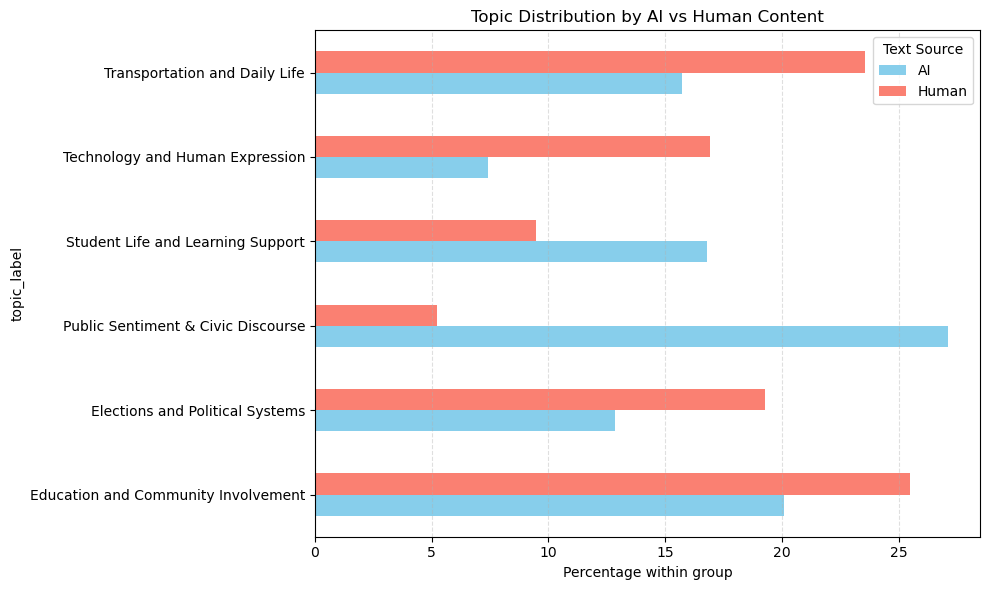

In [9]:
data["label"] = data["generated"].map({0.0: "Human", 1.0: "AI"})
topic_distribution = lda_model6.transform(count_matrix)
data["dominant_topic"] = topic_distribution.argmax(axis=1)
topic_labels = {
    0: "Public Sentiment & Civic Discourse",
    1: "Transportation and Daily Life",
    2: "Elections and Political Systems",
    3: "Student Life and Learning Support",
    4: "Education and Community Involvement",
    5: "Technology and Human Expression"
}
data["topic_label"] = data["dominant_topic"].map(topic_labels)

# Compute percentage-based topic distribution across AI vs Human
topic_counts = pd.crosstab(data['topic_label'], data['label'], normalize='columns') * 100
topic_counts = topic_counts.round(2)

# Plot comparison bar chart
import matplotlib.pyplot as plt

topic_counts.plot(kind='barh', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.xlabel("Percentage within group")
plt.title("Topic Distribution by AI vs Human Content")
plt.legend(title='Text Source')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ellaxu/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


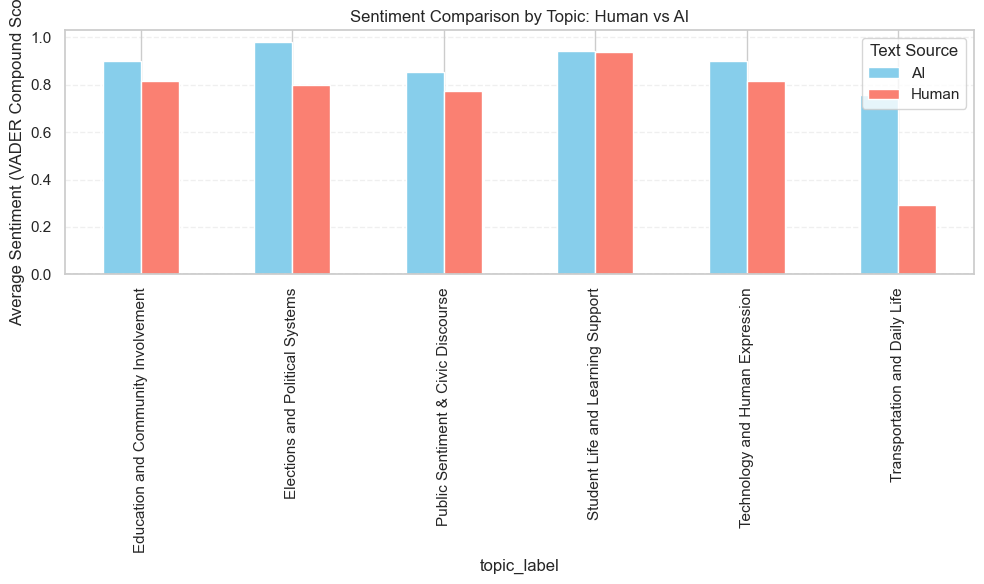

In [11]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
data["sentiment"] = data["normalized_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

sentiment_summary = data.groupby(["topic_label", "label"])["sentiment"].mean().unstack()

sentiment_summary.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.ylabel("Average Sentiment (VADER Compound Score)")
plt.title("Sentiment Comparison by Topic: Human vs AI")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend(title="Text Source")
plt.show()

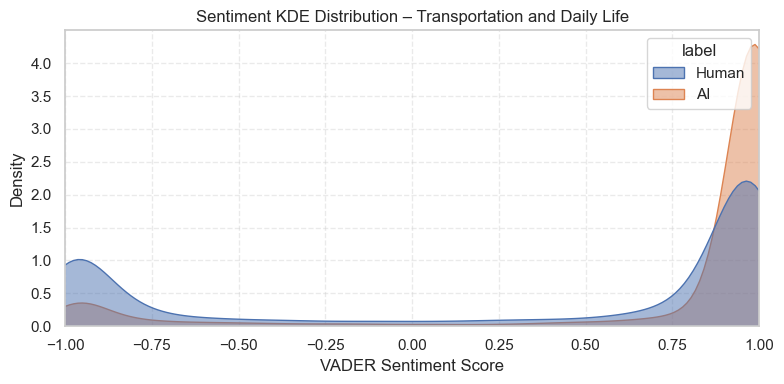

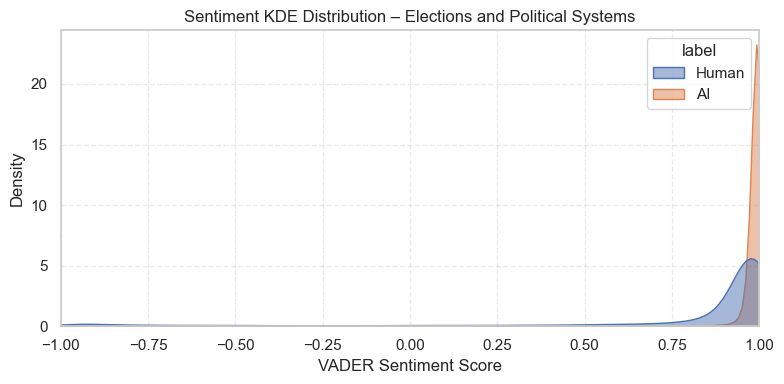

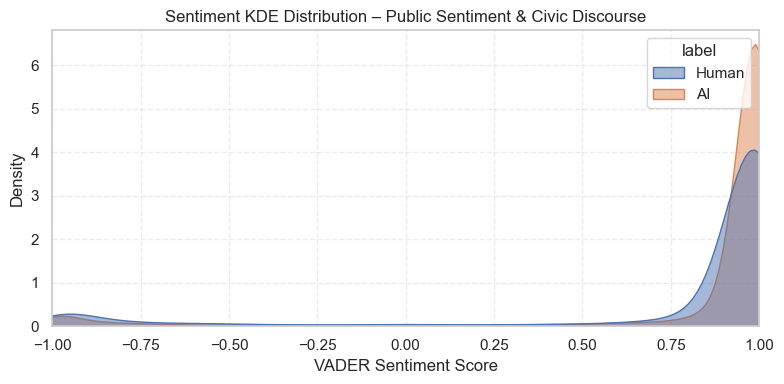

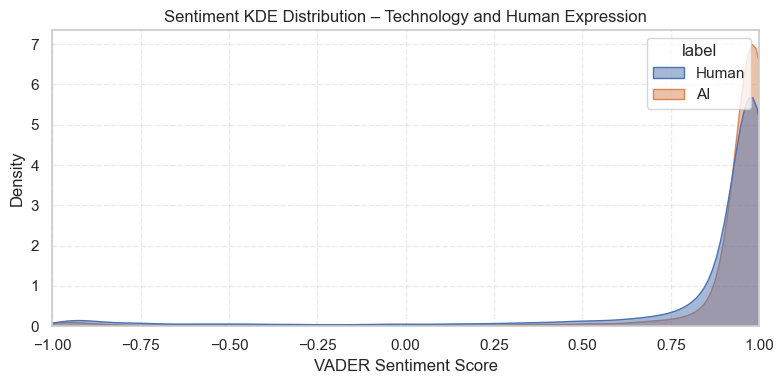

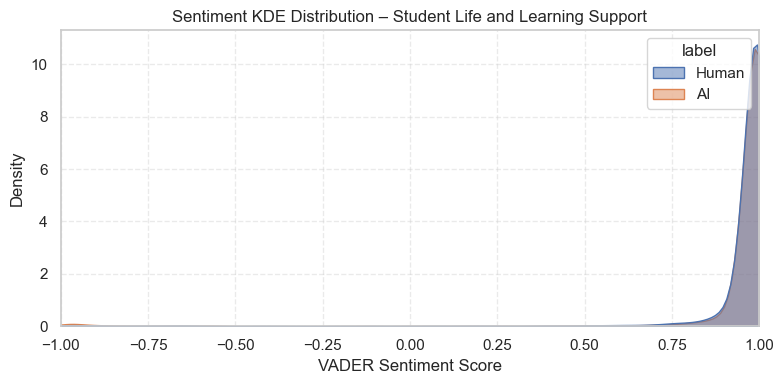

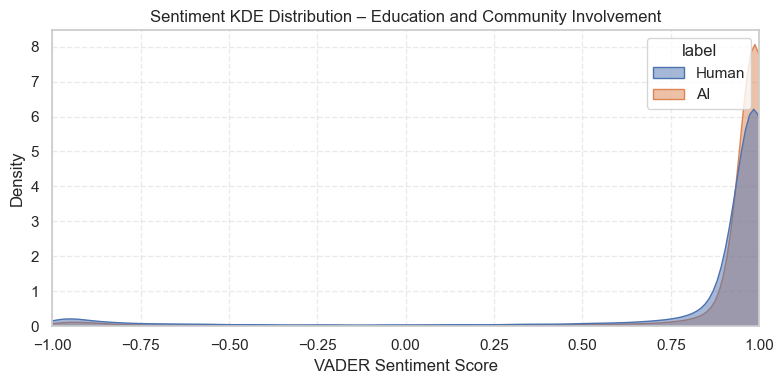

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(style="whitegrid")
unique_topics = data["topic_label"].unique()

for topic in unique_topics:
    subset = data[data["topic_label"] == topic]

    # KDE plot
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=subset, x="sentiment", hue="label", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Sentiment KDE Distribution – {topic}")
    plt.xlabel("VADER Sentiment Score")
    plt.xlim(-1, 1)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

    # Histogram plot
    #plt.figure(figsize=(8, 4))
    #sns.histplot(data=subset, x="sentiment", hue="label", bins=25, kde=False, element="step", stat="density", common_norm=False)
    #plt.title(f"Sentiment Histogram – {topic}")
    #plt.xlabel("VADER Sentiment Score")
    #plt.xlim(-1, 1)
    #plt.grid(True, linestyle="--", alpha=0.4)
    #plt.tight_layout()
    #plt.show()

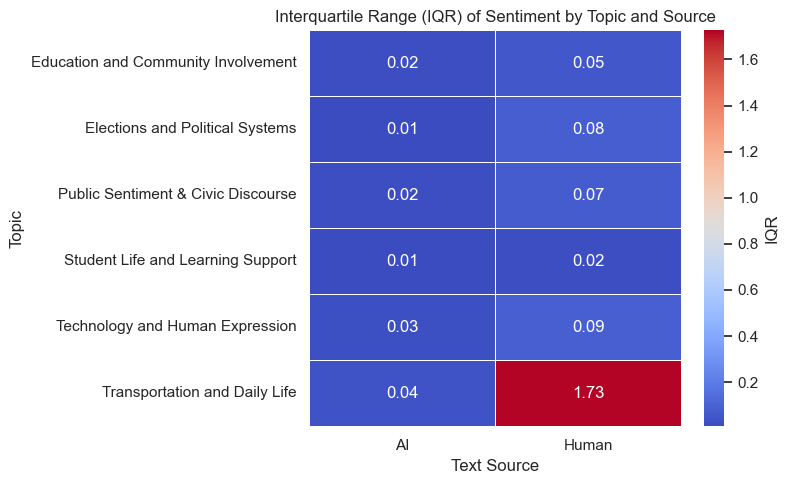

In [19]:
quantile_table = (
    data.groupby(["topic_label", "label"])["sentiment"]
    .quantile([0.25, 0.5, 0.75])
    .unstack(level=-1)
    .rename(columns={0.25: "Q1", 0.5: "Median", 0.75: "Q3"})
)

quantile_table["IQR"] = quantile_table["Q3"] - quantile_table["Q1"]
quantile_table = quantile_table.reset_index()

# Pivot for heatmap
heatmap_data = quantile_table.pivot(index="topic_label", columns="label", values="IQR")

# Plot heatmap of IQRs
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'IQR'})
plt.title("Interquartile Range (IQR) of Sentiment by Topic and Source")
plt.xlabel("Text Source")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
original_lexicon = sia.lexicon.copy()

weakened_lexicon = {}

for word, score in original_lexicon.items():
    if score > 0:
        weakened_lexicon[word] = score * 0.4 
    elif score < 0:
        weakened_lexicon[word] = score * 0.8 
    else:
        weakened_lexicon[word] = score  

sia.lexicon.update(weakened_lexicon)

data["sentiment_tuned"] = data["normalized_text"].apply(lambda x: sia.polarity_scores(x)["compound"])

In [14]:
data.to_csv(f"AI_Human_with_score.csv", index=False)

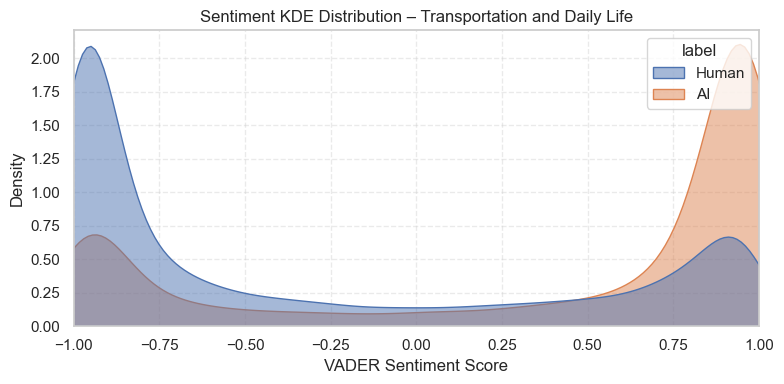

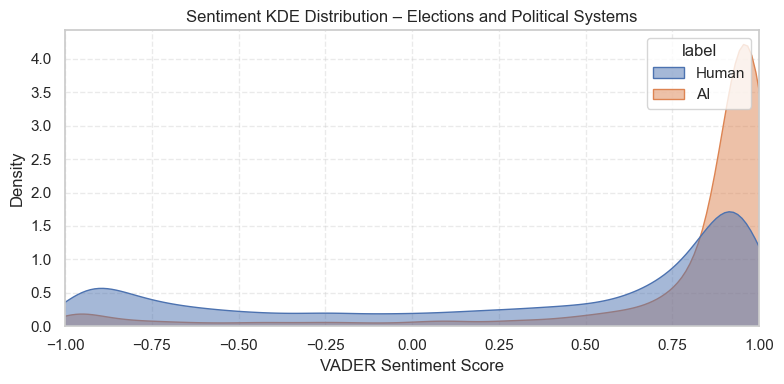

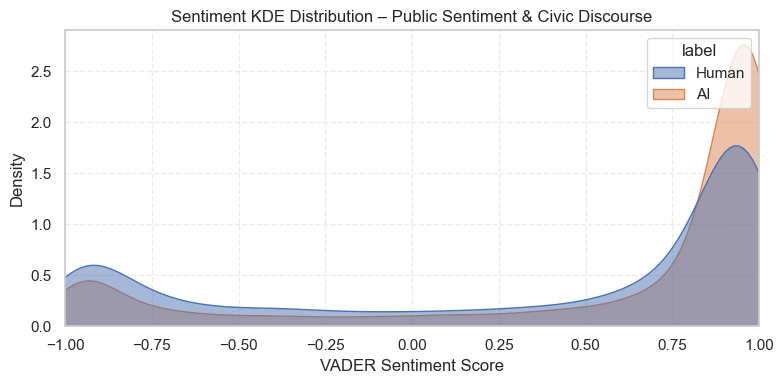

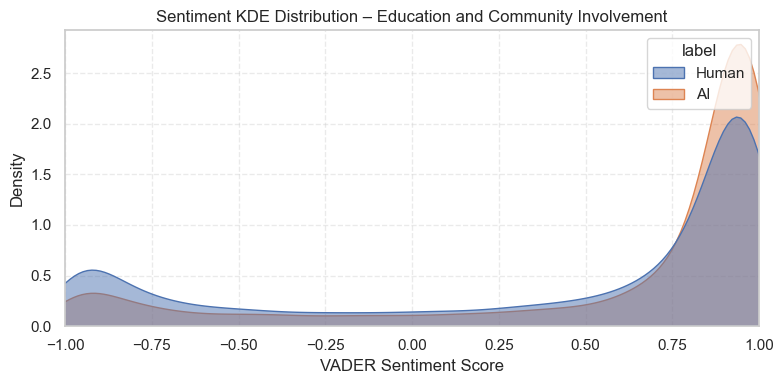

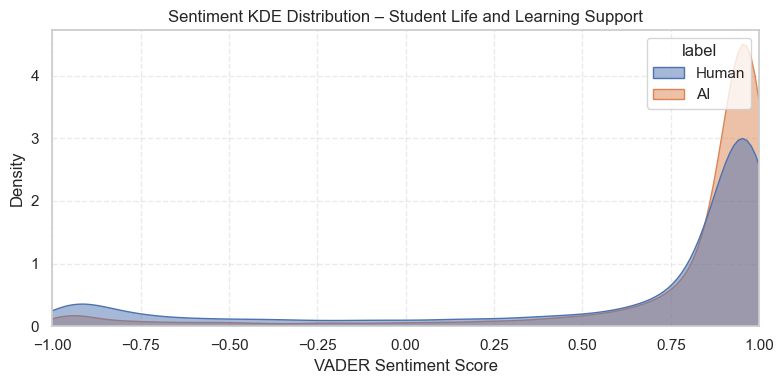

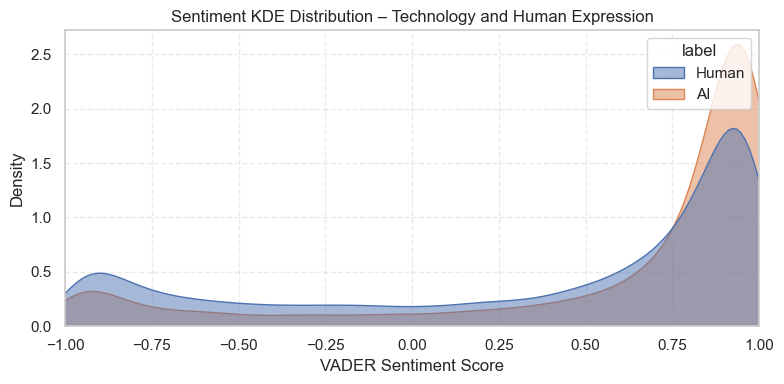

In [26]:
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
sns.set(style="whitegrid")
unique_topics = data["topic_label"].unique()

for topic in unique_topics:
    subset = data[data["topic_label"] == topic]

    # KDE plot
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=subset, x="sentiment_tuned", hue="label", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Sentiment KDE Distribution – {topic}")
    plt.xlabel("VADER Sentiment Score")
    plt.xlim(-1, 1)
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

- Interesting findings here. When it comes to negative feelings, human express more negative feelings while AI tend to express more positive feelings. We may conclude here that AI tries to be polite and their emotion variability is much lower than human's, especially when it comes to negative feelings.

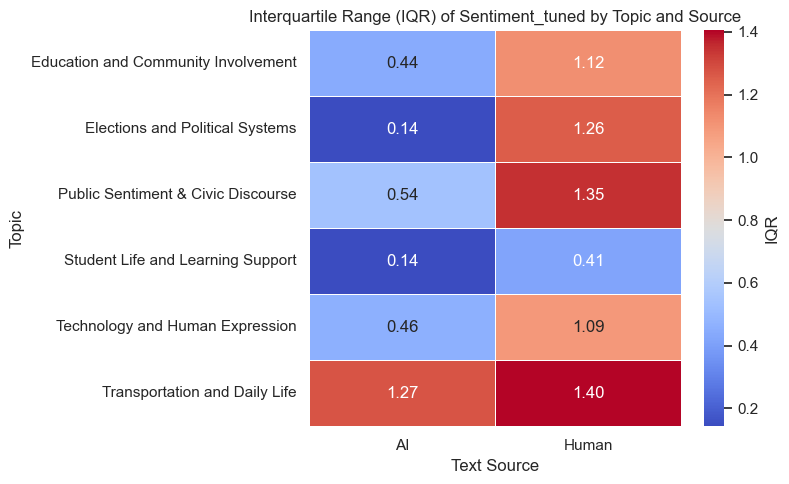

In [27]:
quantile_table = (
    data.groupby(["topic_label", "label"])["sentiment_tuned"]
    .quantile([0.25, 0.5, 0.75])
    .unstack(level=-1)
    .rename(columns={0.25: "Q1", 0.5: "Median", 0.75: "Q3"})
)

quantile_table["IQR"] = quantile_table["Q3"] - quantile_table["Q1"]
quantile_table = quantile_table.reset_index()

# Pivot for heatmap
heatmap_data = quantile_table.pivot(index="topic_label", columns="label", values="IQR")

# Plot heatmap of IQRs
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'IQR'})
plt.title("Interquartile Range (IQR) of Sentiment_tuned by Topic and Source")
plt.xlabel("Text Source")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()

- **For our project, we can end here. The below code is simply trying to use LLM to tune the VADER score. Due to the limited computaional resources and limited time, we fail to further derive a final score to allocate the work to human or to AI. This can count as a shortcoming as we use AI to tell us whether the task is appropriate for AI, this may cause some problems**

## **How can we write the report**
- Indicating our objective: See how human generated text vs. AI generated text differ in addressing, and how the energy within the text differ so that we can apply them to different business applications. 
- Second part data overview/ how the BoW perform/ What's the difference between n = 2,4,6 and why we choose 6. 
- Third part VADER score. How the origional VADER score perform. The origional VADER score is clustered at the positive end, making it really hard to distingush -> tune the VADER score regarding to polarity -> from the tuned VADER score, we find that for each of the category, the threshold where the human text added value doesn't differ much, approximately around 0.8. Meaning for this tuned VADER score, when score>0.8 we can use AI to solve the problem, as score < 0.8, human preferred. We can also conclude that human are better at handling negative-perspective problems.
- Forth part, shortcoming: LLM fail(See code below for reasons)/ BoW classification is not so obvious and the classified topic not so related to our business objective
- Fifth part: Conclusion: Human text adds value for expressing negative or human emotions.

## Maping based on energy level

In [21]:
data["sentiment_energy"] = data["sentiment_tuned"].abs()
def label_energy_level(e):
    if e < 0.2:
        return "Low"
    elif e < 0.6:
        return "Medium"
    else:
        return "High"

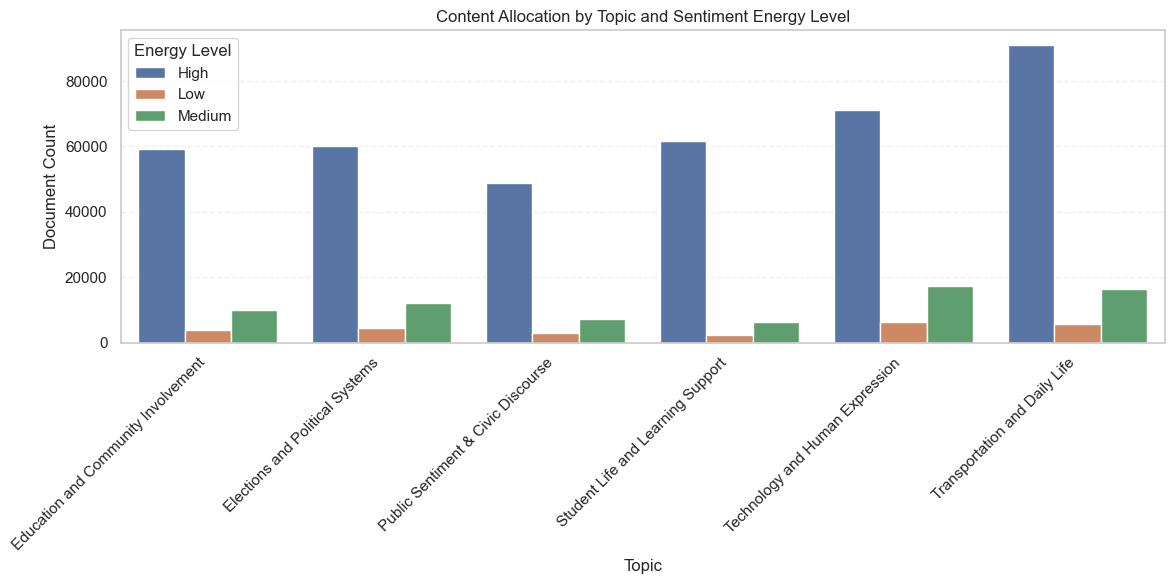

In [30]:
summary = (
    data.groupby(["topic_label", "energy_level"])
    .size()
    .reset_index(name="count")
)

# Plot stacked bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=summary,
    x="topic_label",
    y="count",
    hue="energy_level"
)

plt.title("Content Allocation by Topic and Sentiment Energy Level")
plt.xlabel("Topic")
plt.ylabel("Document Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Energy Level")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

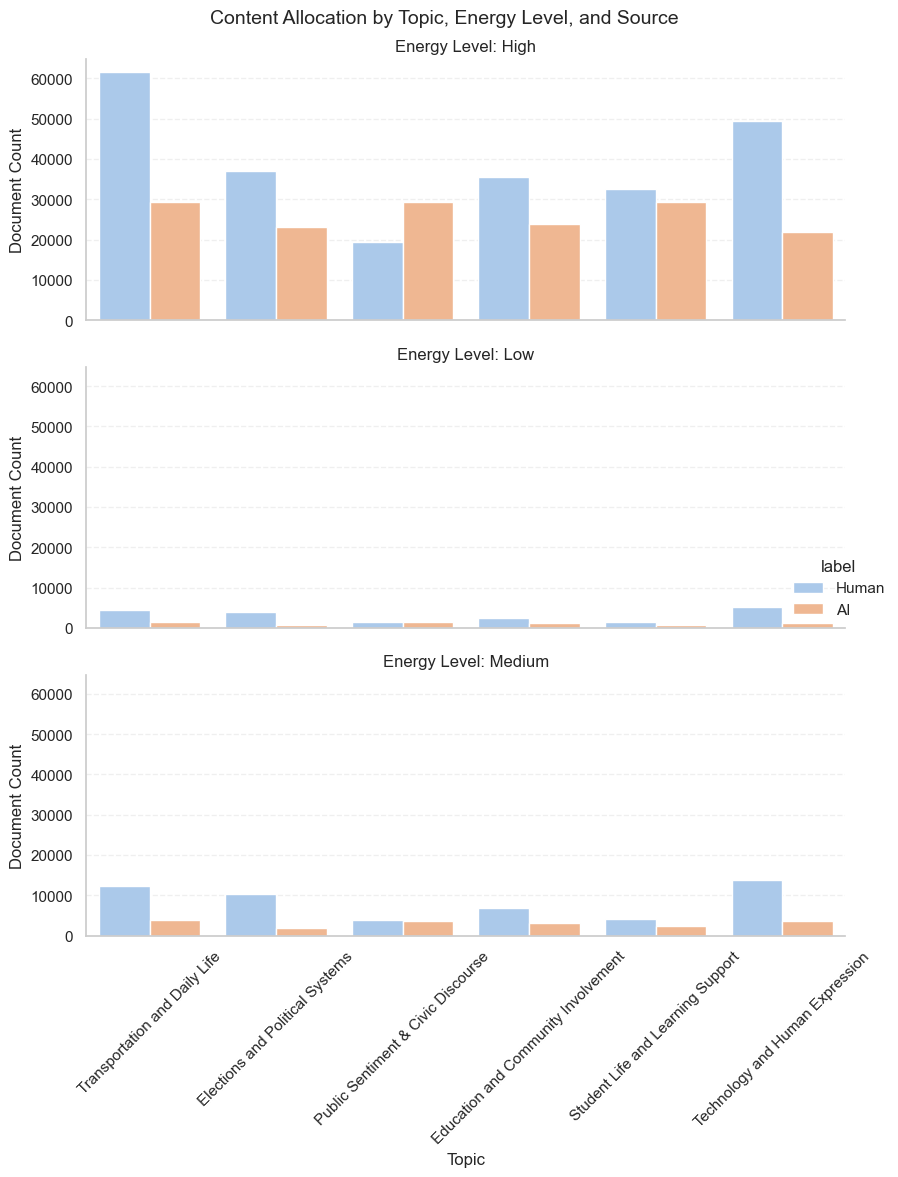

In [32]:
sns.set(style="whitegrid")

g = sns.catplot(
    data=data,
    kind="count",
    x="topic_label",
    hue="label",
    row="energy_level",      
    height=4,
    aspect=2,
    palette="pastel"
)

g.set_titles("Energy Level: {row_name}")
g.set_axis_labels("Topic", "Document Count")

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Content Allocation by Topic, Energy Level, and Source", fontsize=14)
plt.tight_layout()
plt.show()

In [33]:
data

,normalized_text,generated,label,dominant_topic,topic_label,sentiment,sentiment_tuned,sentiment_energy,energy_level,allocation
0,car car around since become famous 1900s henry...,0.0,Human,1,Transportation and Daily Life,0.7650,-0.8750,0.8750,High,Social Media / Brand Storytelling / Support Es...
1,transportation large necessity country worldwi...,0.0,Human,1,Transportation and Daily Life,-0.2040,-0.8877,0.8877,High,Social Media / Brand Storytelling / Support Es...
2,america love affair vehicle seem cool elisabet...,0.0,Human,1,Transportation and Daily Life,0.9972,0.8916,0.8916,High,Social Media / Brand Storytelling / Support Es...
3,often ride car drive motor vehicle work store ...,0.0,Human,1,Transportation and Daily Life,0.9886,-0.0526,0.0526,Low,Can Consider AI Rewrite
4,car wonderful thing perhaps world great advanc...,0.0,Human,1,Transportation and Daily Life,-0.9643,-0.9935,0.9935,High,Social Media / Brand Storytelling / Support Es...
...,...,...,...,...,...,...,...,...,...,...
487230,tie face mar really big misunderstanding stron...,0.0,Human,5,Technology and Human Expression,0.5221,-0.2753,0.2753,Medium,Product Copy / Blog Posts / Onboarding Flows
487231,whole purpose democracy create government refl...,0.0,Human,2,Elections and Political Systems,0.9709,0.7184,0.7184,High,Social Media / Brand Storytelling / Support Es...
487232,firmly believe government worldwide take immed...,1.0,AI,2,Elections and Political Systems,0.5574,-0.9501,0.9501,High,Needs Review – Too Energetic for AI
487233,dfnt agree decision lft ff kid may nft want tf...,0.0,Human,3,Student Life and Learning Support,0.9951,0.9399,0.9399,High,Social Media / Brand Storytelling / Support Es...


### LLM Score Retune:
- Hugging Face Transformers + Pipelines (zero-shot classification)
    - What it does:
        - Classifies text into emotionally expressive vs. neutral
        - Also supports custom labels like “AI-suitable” or “Human-preferred”

In [15]:
pip install transformers pandas

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Example
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli",batch_size=8)

labels = ["Emotionally Expressive", "Neutral", "AI-suitable", "Human-preferred"]

def classify_text(text):
    result = classifier(str(text), candidate_labels=labels)
    return result["labels"][0]

example_row = data.loc[5,"normalized_text"]
classify_text(example_row)

'Emotionally Expressive'

- Due to the limited computational power, we would run just 200 rows (Sample) for tuning purpose

In [4]:
data = pd.read_csv(f"AI_Human_with_score.csv")

In [19]:
data

,normalized_text,generated,label,dominant_topic,topic_label,sentiment,sentiment_tuned
0,car car around since become famous 1900s henry...,0.0,Human,1,Transportation and Daily Life,0.7650,-0.8750
1,transportation large necessity country worldwi...,0.0,Human,1,Transportation and Daily Life,-0.2040,-0.8877
2,america love affair vehicle seem cool elisabet...,0.0,Human,1,Transportation and Daily Life,0.9972,0.8916
3,often ride car drive motor vehicle work store ...,0.0,Human,1,Transportation and Daily Life,0.9886,-0.0526
4,car wonderful thing perhaps world great advanc...,0.0,Human,1,Transportation and Daily Life,-0.9643,-0.9935
...,...,...,...,...,...,...,...
487214,tie face mar really big misunderstanding stron...,0.0,Human,5,Technology and Human Expression,0.5221,-0.2753
487215,whole purpose democracy create government refl...,0.0,Human,2,Elections and Political Systems,0.9709,0.7184
487216,firmly believe government worldwide take immed...,1.0,AI,1,Transportation and Daily Life,0.5574,-0.9501
487217,dfnt agree decision lft ff kid may nft want tf...,0.0,Human,3,Student Life and Learning Support,0.9951,0.9399


In [20]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli",batch_size=8)

labels = ["AI-suitable", "Human-preferred"]

def classify_text(text):
    result = classifier(str(text), candidate_labels=labels)
    print(result["labels"][0])
    return result["labels"][0]

max_attempts = 100  

attempt = 0
while attempt < max_attempts:
    sample_data = data.sample(n=50, random_state=42).copy()
    unique_labels = sample_data["topic_label"].nunique()
    
    if unique_labels == 6:
        print(f"Found sample with 6 unique topic_label values on attempt {attempt+1}")
        break
    
    attempt += 1
else:
    print("Failed to find a sample with 6 unique topic_label values after maximum attempts.")

sample_data["zero_shot_label"] = sample_data["normalized_text"].apply(classify_text)

sample_data.to_csv("zero_shot_sample_50.csv", index=False)
print("50 randomly sampled rows labeled and saved to 'zero_shot_sample_50.csv'")

Found sample with 6 unique topic_label values on attempt 1
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
AI-suitable
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
Human-preferred
50 randomly sampled rows labeled and saved to 'zero_shot_sample_50.csv'


In [9]:
sample_data.head()

,normalized_text,generated,label,dominant_topic,topic_label,sentiment,sentiment_tuned,zero_shot_label
156675,want bzt b average role cry kid coach mad new ...,0.0,Human,4,Education and Community Involvement,0.9300,-0.6508,Emotionally Expressive
144703,think student must participate extracurricular...,0.0,Human,4,Education and Community Involvement,0.9972,0.9773,Emotionally Expressive
210471,dear senator write raw day raw express concern...,1.0,AI,2,Elections and Political Systems,0.9965,0.9700,Emotionally Expressive
275186,debate best way influence others ongoing centu...,1.0,AI,0,Public Sentiment & Civic Discourse,0.9979,0.9795,Emotionally Expressive
265907,electoral college process place electoral coll...,0.0,Human,2,Elections and Political Systems,0.8834,0.2023,Emotionally Expressive


Label Counts:

zero_shot_label
Emotionally Expressive    170
Human-preferred            29
AI-suitable                 1
Name: count, dtype: int64


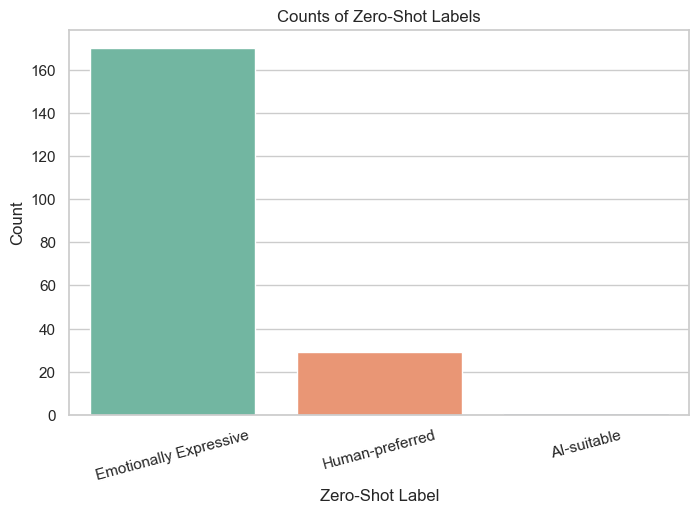

In [17]:
label_counts = sample_data["zero_shot_label"].value_counts()

print("Label Counts:\n")
print(label_counts)
plt.figure(figsize=(8, 5))
sns.countplot(data=sample_data, x="zero_shot_label", order=label_counts.index, palette="Set2")
plt.title("Counts of Zero-Shot Labels")
plt.xlabel("Zero-Shot Label")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075:

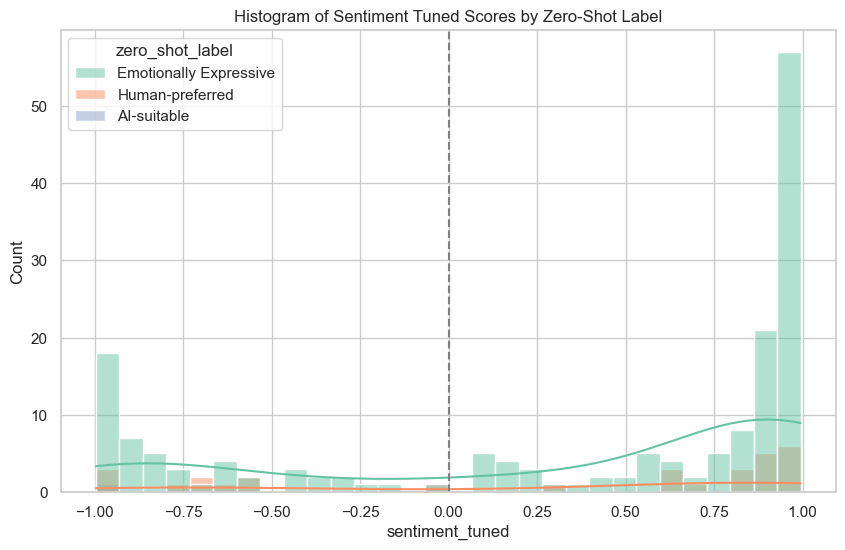

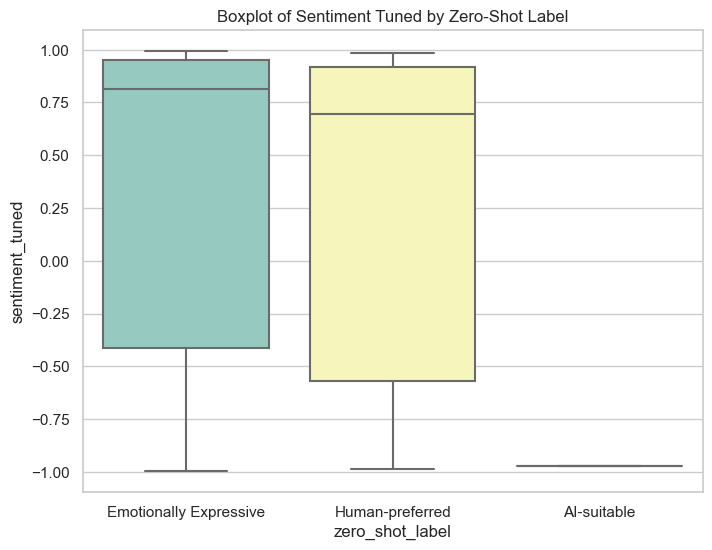

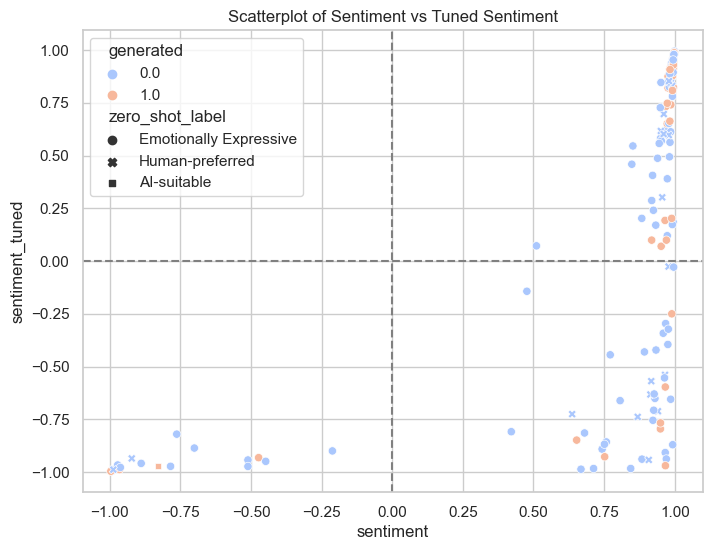

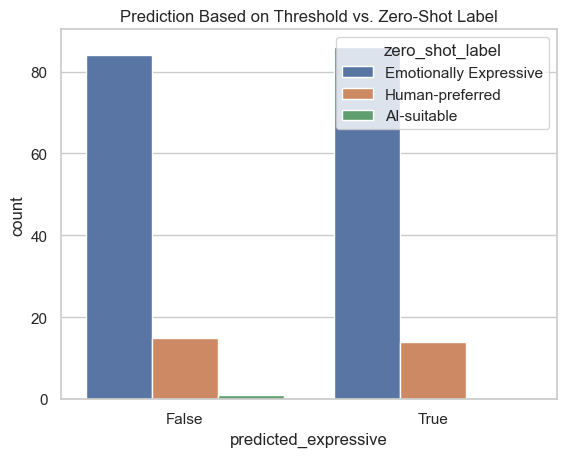

In [14]:
sns.set(style="whitegrid")

# Histogram of sentiment_tuned by zero_shot_label
plt.figure(figsize=(10, 6))
sns.histplot(data=sample_data, x="sentiment_tuned", hue="zero_shot_label", bins=30, kde=True, palette="Set2")
plt.title("Histogram of Sentiment Tuned Scores by Zero-Shot Label")
plt.axvline(0, color="gray", linestyle="--")
plt.show()

# Boxplot by zero_shot_label
plt.figure(figsize=(8, 6))
sns.boxplot(data=sample_data, x="zero_shot_label", y="sentiment_tuned", palette="Set3")
plt.title("Boxplot of Sentiment Tuned by Zero-Shot Label")
plt.show()

# Scatterplot of sentiment vs sentiment_tuned
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sample_data, x="sentiment", y="sentiment_tuned", hue="generated", style="zero_shot_label", palette="coolwarm")
plt.title("Scatterplot of Sentiment vs Tuned Sentiment")
plt.axhline(0, color="gray", linestyle="--")
plt.axvline(0, color="gray", linestyle="--")
plt.show()

# Play with threshold
threshold = 0.8
sample_data["predicted_expressive"] = sample_data["sentiment_tuned"] > threshold

# Bar plot of prediction vs zero-shot
sns.countplot(data=sample_data, x="predicted_expressive", hue="zero_shot_label")
plt.title("Prediction Based on Threshold vs. Zero-Shot Label")
plt.show()

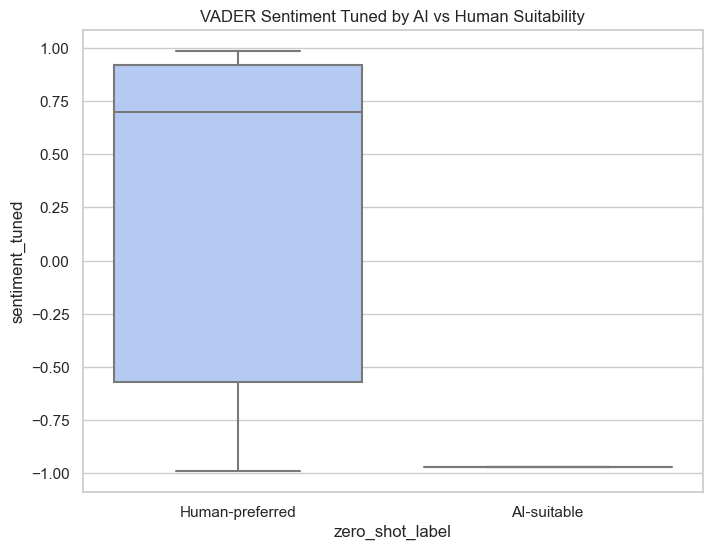

/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ellaxu/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1075:

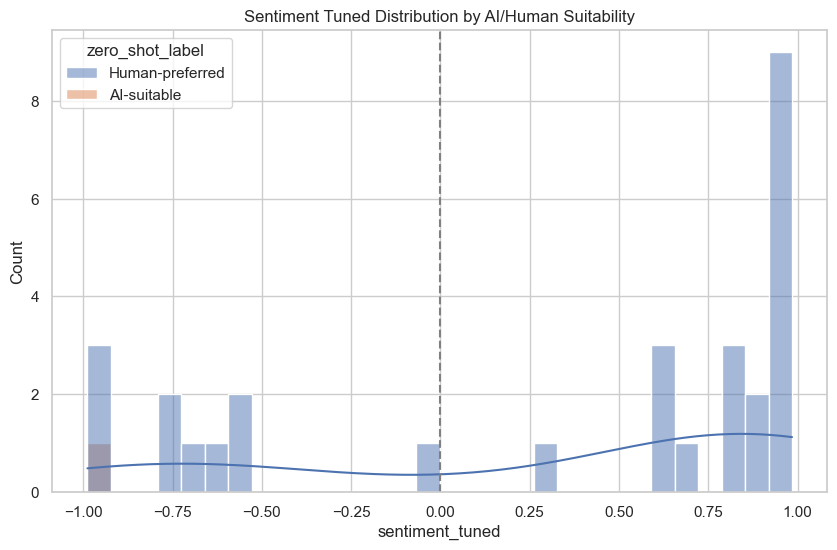

Mean Sentiment Tuned:
 zero_shot_label
AI-suitable       -0.97150
Human-preferred    0.30499
Name: sentiment_tuned, dtype: float64
Std Dev of Sentiment Tuned:
 zero_shot_label
AI-suitable             NaN
Human-preferred    0.758544
Name: sentiment_tuned, dtype: float64


In [18]:
subset = sample_data[sample_data["zero_shot_label"].isin(["AI-suitable", "Human-preferred"])]
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=subset, x="zero_shot_label", y="sentiment_tuned", palette="coolwarm")
plt.title("VADER Sentiment Tuned by AI vs Human Suitability")
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=subset, x="sentiment_tuned", hue="zero_shot_label", kde=True, bins=30)
plt.axvline(0, color="gray", linestyle="--")
plt.title("Sentiment Tuned Distribution by AI/Human Suitability")
plt.show()

mean_scores = subset.groupby("zero_shot_label")["sentiment_tuned"].mean()
std_scores = subset.groupby("zero_shot_label")["sentiment_tuned"].std()

print("Mean Sentiment Tuned:\n", mean_scores)
print("Std Dev of Sentiment Tuned:\n", std_scores)

- As HuggingFace's LLM doesn't work so well